In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'C:\ALEXDataanalysis course resources\Python project resources\movies.csv', dtype={'gross' : str})
#since i have large numbers in the data i am using (dtype= largenumbers :str) which changes imports large numbers as string and can be chaged to numeric 

In [2]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{}- {}%'.format(col,pct_missing))

name- 0.0%
rating- 0.010041731872717789%
genre- 0.0%
year- 0.0%
released- 0.0002608242044861763%
score- 0.0003912363067292645%
votes- 0.0003912363067292645%
director- 0.0%
writer- 0.0003912363067292645%
star- 0.00013041210224308815%
country- 0.0003912363067292645%
budget- 0.2831246739697444%
gross- 0.02464788732394366%
company- 0.002217005738132499%
runtime- 0.0005216484089723526%


In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross        object
company      object
runtime     float64
dtype: object

In [5]:
#since there is missing data, we first change float type to numeric value using pd.to_numeric and uses errors = coerce in case the float value can't be changed into numeric it changes into NaN and then fill it with 0 which makes it easier to convert type to int
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(np.int64)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(np.int64) 
df.dtypes
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
df= df.sort_values(by=['gross'], inplace = False , ascending = False)

In [7]:
#this line allows us to see whole of data 
pd.set_option('display.max_rows',None)

In [8]:
#removing duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [9]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


<Axes: xlabel='budget', ylabel='gross'>

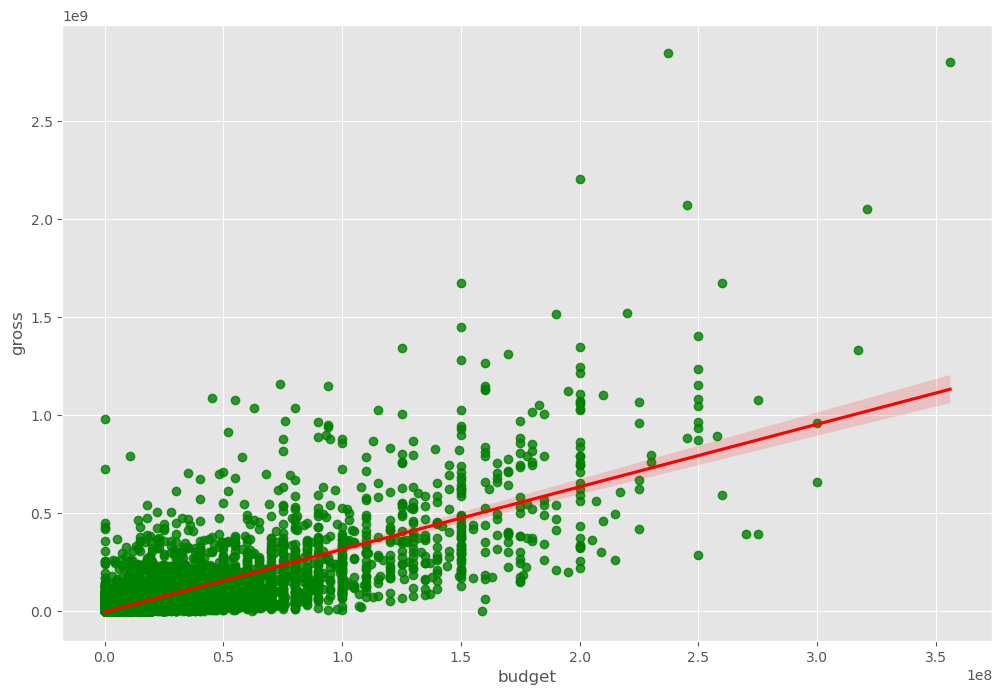

In [10]:
#drawing regression plat using seaborn

sns.regplot(x = 'budget', y= 'gross', data= df, scatter_kws ={'color':'green'}, line_kws= {'color':'red'})

In [11]:
#df['rating'] = df['rating'].astype(float)
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [31]:
#droping object type columns and storing output in seperate dataframe so correlation can be calculated
def drop_object_columns(df):
    df1 = df.copy()
    for col in df.columns:
        if df[col].dtype == 'object':
            df1 = df1.drop(columns=[col])
            print(f"Dropped column: {col}")
    return df1

df1 = drop_object_columns(df)

Dropped column: name
Dropped column: rating
Dropped column: genre
Dropped column: released
Dropped column: director
Dropped column: writer
Dropped column: star
Dropped column: country
Dropped column: company


In [81]:
corr_matrix = df1.corr(method = 'pearson') #type of correlation : pearson , kendall, spearman
corr_matrix
sort_corr_matrix = corr_matrix.sort_index(axis = 0).sort_index(axis=1)
sort_corr_matrix

,budget,gross,runtime,score,votes,year
budget,1.000000,0.750157,0.269510,0.055665,0.486862,0.309212
gross,0.750157,1.000000,0.245235,0.186392,0.632834,0.261900
runtime,0.269510,0.245235,1.000000,0.399451,0.309212,0.120811
score,0.055665,0.186392,0.399451,1.000000,0.409182,0.097995
votes,0.486862,0.632834,0.309212,0.409182,1.000000,0.222945
year,0.309212,0.261900,0.120811,0.097995,0.222945,1.000000


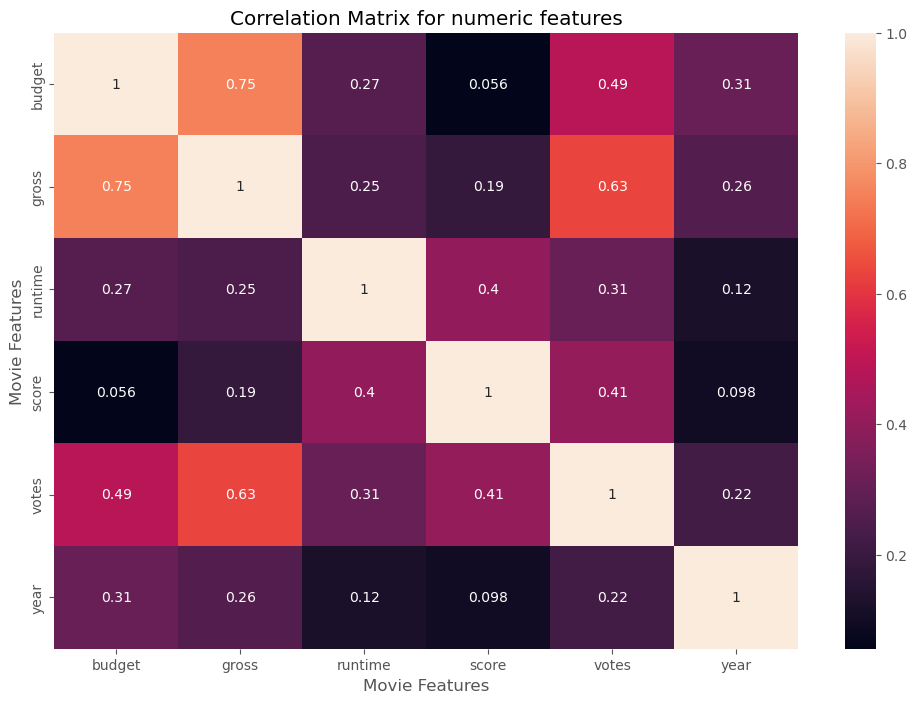

In [87]:
sns.heatmap(sort_corr_matrix, annot= True)
plt.title('Correlation Matrix for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()